In [6]:
import geopandas as gpd

# Replace with the path to your shapefile
shapefile_path = 'California_Zip_Codes.shp'

try:
    # Read the shapefile into a GeoDataFrame
    gdf = gpd.read_file(shapefile_path)

    # Print the GeoDataFrame
    print(gdf.head())  # Print the first few rows for verification
except Exception as e:
    print(f"Error: {e}")




Error: Unable to open California_Zip_Codes.shx or California_Zip_Codes.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.


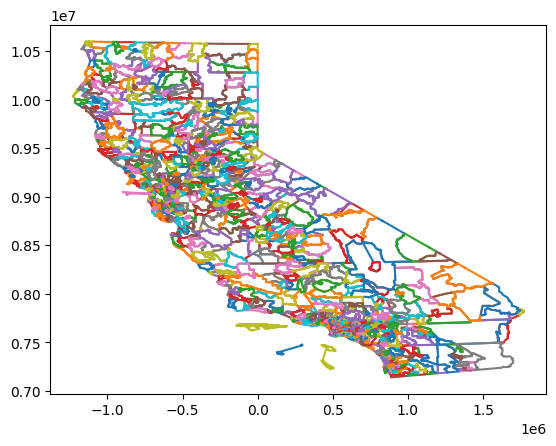

In [12]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("/Users/charosa/Documents/CA POPULATION/California_Zip_Codes (1)/California_Zip_Codes.dbf")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [37]:
import geopandas as gpd

# Replace with the path to your California shapefile
shapefile_path = 'California_Zip_Codes (1)/California_Zip_Codes.shp'
gdf = gpd.read_file(shapefile_path)
print(type(gdf))


# Define the transformer
transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

# Transform the geometry coordinates to latitude and longitude
gdf["geometry"] = gdf["geometry"].apply(lambda geom: transformer.transform(geom.centroid.x, geom.centroid.y))

# Extract latitude and longitude
gdf["latitude"] = gdf["geometry"].apply(lambda geom: geom[1])
gdf["longitude"] = gdf["geometry"].apply(lambda geom: geom[0])

# Print the updated GeoDataFrame
print(gdf.head())



<class 'geopandas.geodataframe.GeoDataFrame'>
   OBJECTID ZIP_CODE                  PO_NAME STATE  POPULATION  POP_SQMI  \
0         1    00012          Mt Meadows Area    CA         -99     -99.0   
1         2    00016  Sequoia National Forest    CA         -99     -99.0   
2         3    00017  Northeast Fresno County    CA         -99     -99.0   
3         4    00018    Los Padres Ntl Forest    CA         -99     -99.0   
4         5    00019        Lassen Ntl Forest    CA         -99     -99.0   

     SQMI     SHAPE_Leng    SHAPE_Area  \
0   30.92  195388.619180  8.621574e+08   
1   39.33  169790.572348  1.096296e+09   
2  564.38  873109.208350  1.573415e+10   
3   90.83  294311.333366  2.532222e+09   
4  412.59  533289.128828  1.150261e+10   

                                   geometry   latitude   longitude  
0   (-120.940656332833, 40.236543763700894)  40.236544 -120.940656  
1   (-118.41974084459882, 35.4997509565342)  35.499751 -118.419741  
2  (-118.85736308850488, 37.291

/var/folders/87/7ynwhrz96_bgx9_z5y53stwm0000gp/T/ipykernel_31169/2851239227.py:13: UserWarning: Geometry column does not contain geometry.
  gdf["geometry"] = gdf["geometry"].apply(lambda geom: transformer.transform(geom.centroid.x, geom.centroid.y))


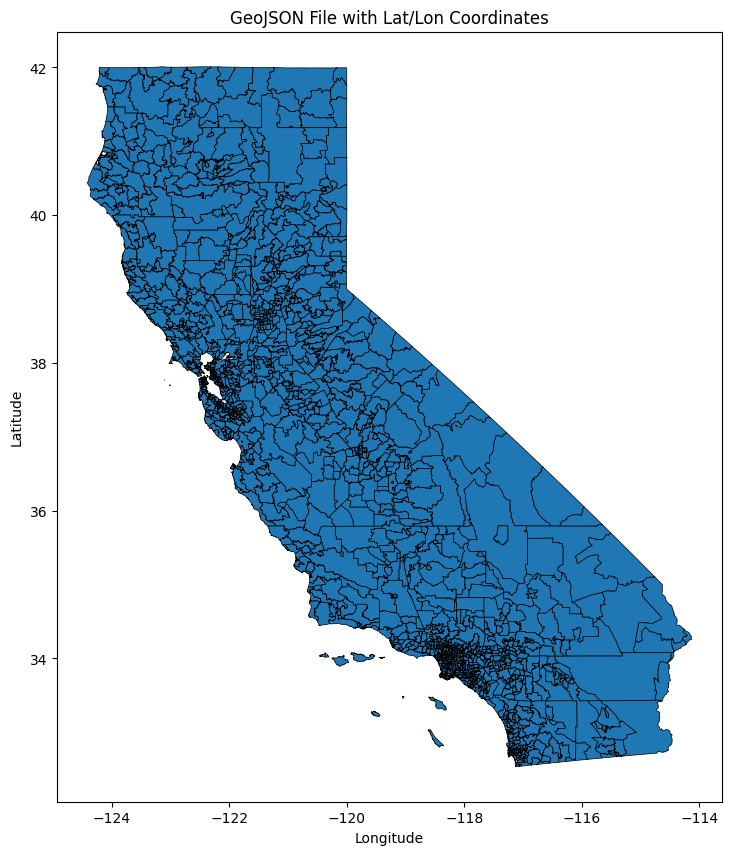

In [39]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt

# Replace with the path to your GeoJSON file
geojson_path = 'California_Zip_Codes.geojson'

gdf = gpd.read_file(geojson_path)

# Ensure that the 'geometry' column is recognized as a GeoSeries
gdf = gdf.set_geometry('geometry')

# Define the transformer
transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

# Transform the entire GeoDataFrame to latitude and longitude
gdf = gdf.to_crs("EPSG:4326")

# Extract latitude and longitude
gdf["latitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.y)
gdf["longitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.x)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)
plt.title("GeoJSON File with Lat/Lon Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [14]:
from pyproj import Transformer

# Define the transformer
transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

# Transform the geometry coordinates to latitude and longitude
gdf["geometry"] = gdf["geometry"].apply(lambda geom: transformer.transform(geom.x, geom.y))


AttributeError: 'Polygon' object has no attribute 'x'